In [50]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [54]:
def save_slices(data, output_dir, axis_name, num_per_slice):
    ax_str = None
    if axis_name == 0:
        ax_str = 's'
    elif axis_name == 1:
        ax_str = 'c'
    elif axis_name == 2:
        ax_str = 'a'
    
    final_output_path = os.path.join(output_dir, ax_str)
    os.makedirs(final_output_path, exist_ok=True)
    slice_len = data.shape[axis_name]
    for i in range(0, slice_len, math.floor(slice_len / num_per_slice)):
        if axis_name == 2:
            slice_data = data[:, :, i]
        elif axis_name == 0:
            slice_data = data[i, :, :]
        elif axis_name == 1:
            slice_data = data[:, i, :]
        else:
            raise ValueError("Invalid axis_name")
        
        plt.imshow(slice_data, cmap='gray')
        plt.axis('off')
        file_name = f'{"_".join(final_output_path.split(os.path.sep)[-3:])}_slice_{i}.png'
        plt.savefig(os.path.join(final_output_path, file_name), bbox_inches='tight', pad_inches=0)
        plt.close()

def generate_slices(input_file, output_dir, num_per_slice):
    img = nib.load(input_file)
    data = img.get_fdata()
    
    # Axial slices
    save_slices(data, output_dir, 2, num_per_slice)
    
    # Sagittal slices
    save_slices(data, output_dir, 0, num_per_slice)
    
    # Coronal slices
    save_slices(data, output_dir, 1, num_per_slice)

def create_slice_dataset(input_path, output_path, slice_per_axes):
    dirs = os.listdir(input_path)
    for dir in tqdm(dirs, desc="Processing Patients"):
        patient_id = '-'.join(dir.split('-')[2:])
        files = os.listdir(os.path.join(input_path, dir))

        for file in tqdm(files, desc="Processing MRI Types", leave=False):
            mri_type = file.split('-')[-1].split('.')[0]
            generate_slices(os.path.join(input_path, dir, file), os.path.join(output_path, patient_id, mri_type), slice_per_axes)


In [55]:
input='../data/ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'
output = '../data/slice'

Processing Patients:   2%|▏         | 4/219 [01:28<1:19:22, 22.15s/it]


KeyboardInterrupt: 

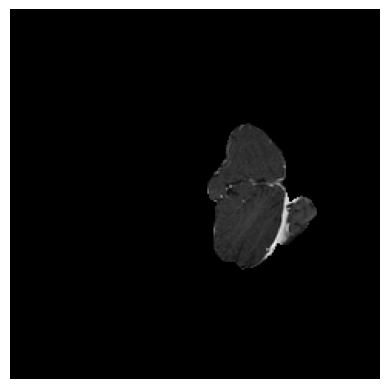

In [56]:
create_slice_dataset(input, output, 30)

In [ ]:
['a', 'b', 'c', 'd'][-3:]

['b', 'c', 'd']

In [77]:
# Function to extract the last number from the filename
def extract_last_number(filename):
    return int(filename.split('_')[-1].split('.')[0])



In [80]:
images

'00001-000_t1c_a_slice_150.png'

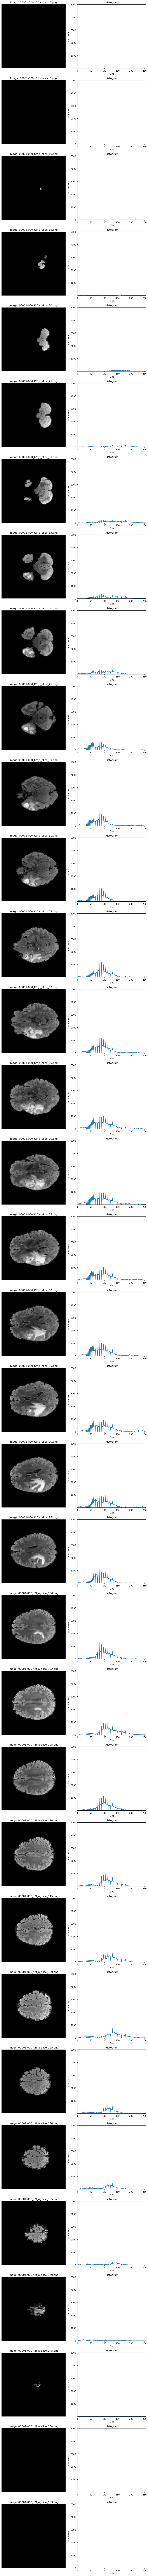

In [87]:
import os
import cv2
import matplotlib.pyplot as plt

path = '../data/slice/00001-000/t2f/a/'
images = os.listdir(path)
# Sort the image filenames based on the last number
images = sorted(images, key=extract_last_number)

# Create a figure with subplots
fig, axs = plt.subplots(len(images), 2, figsize=(10, 5*len(images)))

for i, im in enumerate(images):
    # Read the image
    image = cv2.imread(os.path.join(path, im))

    # Convert the image to grayscale if it's a color image
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    max_possible_pixels = gray_image.shape[0] * gray_image.shape[1]

    # Plot the image
    axs[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title('Image: ' + im)
    axs[i, 0].axis('off')

    # Plot the histogram
    axs[i, 1].plot(hist)
    axs[i, 1].set_title('Histogram')
    axs[i, 1].set_xlabel("Bins")
    axs[i, 1].set_ylabel("# of Pixels")
    axs[i, 1].set_xlim([0, 256])
    axs[i, 1].set_

plt.tight_layout()
plt.show()


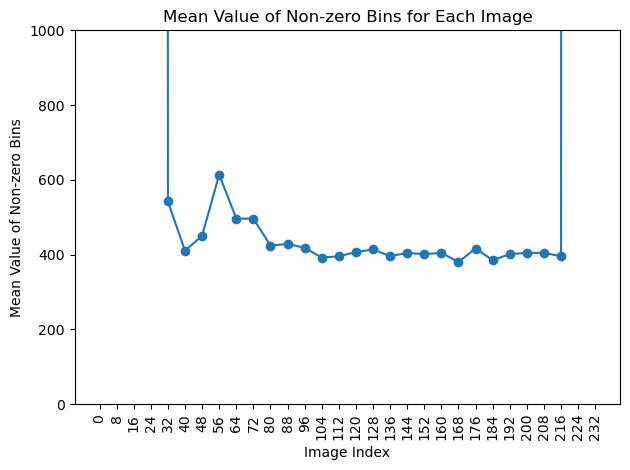

In [101]:

path = '../data/slice/00001-000/t1c/c/'
images = os.listdir(path)
# Sort the image filenames based on the last number
images = sorted(images, key=extract_last_number)
means = []

for filename in images:
    # Read the image
    image = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Calculate mean of non-zero bins
    non_zero_bins = hist[hist > 0]
    mean_non_zero_bins = non_zero_bins.mean()
    means.append(mean_non_zero_bins)

# Plot means
plt.figure()
plt.plot(means, marker='o')
plt.title("Mean Value of Non-zero Bins for Each Image")
plt.xlabel("Image Index")
plt.ylim([0, 1000])
plt.ylabel("Mean Value of Non-zero Bins")
plt.xticks(range(len(images)), [i.split('_')[-1].split('.')[0] for i in images],rotation=90)
plt.tight_layout()
plt.show()